In [1]:
#
# Example of reading Akatsuki UVI fits file, with highpass filtering
#
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from scipy import ndimage

ifldname = "C:/work/Programs/python/akatsuki/"
ifname_uvi = ifldname+ "uvi_20181127_030448_365_l2b_v10.fit"

hdulist_uvi=fits.open(ifname_uvi)
hdulist_uvi.info()

# Because UVI fits file contains actual header & data in extention = 1,
# hdulist_uvi[1] should be selected
hdu_uvi=hdulist_uvi[1]

Filename: C:/work/Programs/python/akatsuki/uvi_20181127_030448_365_l2b_v10.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  UVI-LEVEL2b    0 ImageHDU       212   (1024, 1024)   float32   


In [2]:
# header read
header_uvi=hdu_uvi.header
# Show information in a header
header_uvi

XTENSION= 'IMAGE   '           / type of extension                              
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
PCOUNT  =                    0 / number of parameters per group                 
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'UVI-LEVEL2b'        / name of this HDU                               
EXTVER  =                    0 / version of the extension                       
ORIGIN  = 'VCO/UVI team'       / organization responsible for the data          
DATE    = '2019-11-12T11:36:51' / date of generation of this HDU in UTC         
DATE-BEG= '2018-11-27T03:04:47.718' / date of the start of observation in UTC   
DATE-OBS= '2018-11-27T03:04:

252.99083 -0.30939707


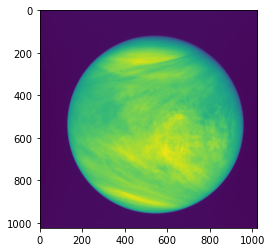

In [3]:
# data read
data_uvi=hdu_uvi.data / 1e6 ## converting unit from W/m3/sr to W/m2/sr/um
print(np.max(data_uvi),np.min(data_uvi))

# Quick Look
udata_akatsuki = np.array(np.clip(data_uvi/np.max(data_uvi)*255,0,255),dtype='u1')
plt.imshow(udata_akatsuki)
plt.show()

Venus radius in image:  413.2476503067004


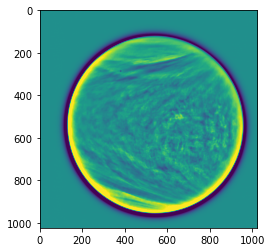

In [4]:
#
# Highpass filtering
#

# Estimate Venus radius in UVI image frame
s_app_radius = 9.71283/2 * np.pi/180 # from value of S_APPDIA in header
s_IFOV = 0.000204619 # from value of S_IFOV in header

# considering CCD projection
radius_v_pix = np.arctan(s_app_radius)/np.arctan(s_IFOV)
print("Venus radius in image: ",radius_v_pix)


# Smoothing image with a gussian filter with r/20 sigma
gauss_sigma = radius_v_pix/20
s_data_uvi = ndimage.gaussian_filter(data_uvi, gauss_sigma)

# Subtracting the smoothed image from original image => Highpass filtering
h_data_uvi = data_uvi-s_data_uvi

# Quick Look
l_value = -30
u_value = 30
udata_akatsuki = np.array(np.clip( ( h_data_uvi -l_value) /(u_value - l_value) * 255,0,255),dtype='u1')
plt.imshow(udata_akatsuki)
plt.show()